<hr>
<h1 style="text-align: center;">Introduction to Aerodynamics and Python</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 0</h3>
<h3 style="text-align: center;">Date: 10/10/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

<hr>

# **Local Software Environment Setup Acknowledgment**

I, Nicholas Richmond, acknowledge that I have downloaded and successfully setup Python, Anaconda, and my desired IDE on my working machine for this course prior to the submission of this assignment. 

10/10/24

<hr>


Setup plotting presets and imports:

In [3]:
#STANDARD IMPORTS
import numpy as np 
import os
import matplotlib.pyplot as plt 
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package 
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib 
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

<hr>

### Problem 1: Boundary Layers and Numeric Integration
1.1: Turbulent Boundary Layer Velocity Profile

For this part of the problem, the goal is to calculate and plot the horizontal velocity distribution in the vertical direction for both a Laminar and a Turbulent boundary layer. 

<hr>

The velocity profile for laminar and turbulent layers is given by the following:
**Laminar Boundary Layer Velocity Profile** 
$$ \frac{u}{u_e} \approx \left[ 2 \left( \frac{y}{\delta} \right) - \left( \frac{y}{\delta} \right)^2 \right] $$

**Turbulent Boundary Layer Velocity Profile** 
$$ \frac{u}{u_e} \approx \left( \frac{y}{\delta} \right)^{\dfrac{1}{7}} $$

where $\frac{y}{\delta}$ is the vertical coordinate in the boundary layer at some x-location non-dimensionalized by the physical boundary layer thickness at that x-location and $\frac{u}{u_{e}}$ is the velocity in the x-direction non-dimensionalized by the x-velocity of the flow at the edge of the boundary
layer (where y = d). 

<hr>

In [10]:
# Initialize x and y variables
ynon = np.linspace(0,1,201) #creates an array of 200 numbers evenly ranging from 0 to 1

unonL = 2*(ynon)-(ynon)**2 #Laminar boundary layer velocity distribution
unonT = ynon**(1/7) #Turbulent boundary layer velocity distribution

Re = 1e8

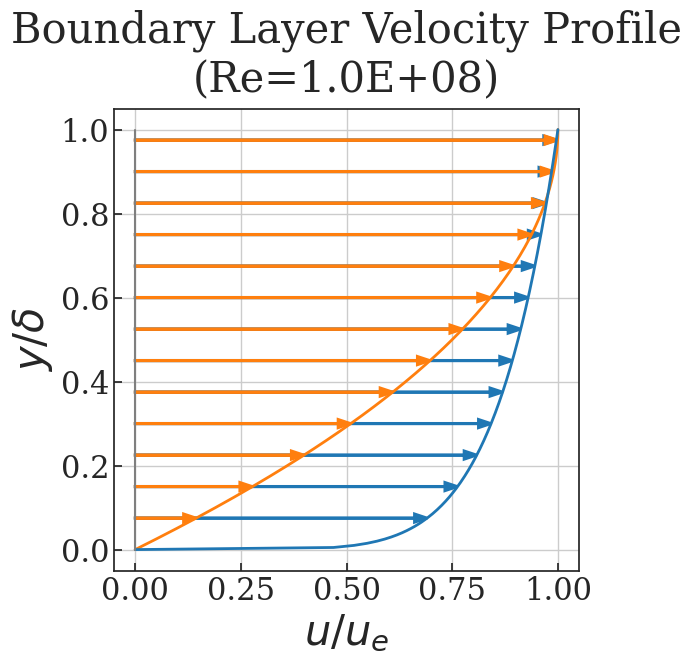

In [18]:
# Plot distribution for a visual representation. Non-dimensional y is on the vertical axis for a more intuitive plot TODO: add legend

plt.figure(figsize=(6,6))
plt.title('Boundary Layer Velocity Profile\n(Re={:1.1E})'.format(Re)) 
plt.xlabel("$u/u_e$") #Label x axis (dollar signs are for number formatting using LaTeX)
plt.ylabel("$y / \\delta$") #Label y axis
line = 2 #linewidth

plt.plot(unonL,ynon,color=colors[1],linewidth = line) #plot laminar boundary layer profile
plt.plot(unonT,ynon,color=colors[0],linewidth = line) #plot turbulent boundary layer profile

vertzeroline = np.zeros(len(ynon))

plt.plot(vertzeroline,ynon,color=colors[7]) #plot a vertical reference line at u/ue = 0

#Add arrows:
wd,ln = 0.02,0.03
for i in range(0, len(ynon), 15):
    if abs(unonT[i]) < ln:
        plt.plot([0, unonT[i]], [ynon[i], ynon[i]], color=colors[0],linewidth=line)
    else:
        plt.arrow(0, ynon[i], unonT[i]-ln, 0, head_width=wd, head_length=ln, fc=colors[0], ec=colors[0], linewidth=line)


for i in range(0, len(ynon), 15):
    if abs(unonL[i]) < ln:
        plt.plot([0, unonL[i]], [ynon[i], ynon[i]], color=colors[1],linewidth=line)
    else:
        plt.arrow(0, ynon[i], unonL[i]-ln, 0, head_width=wd, head_length=ln, fc=colors[1], ec=colors[1], linewidth=line)

plt.show()

<hr>

**1.2: Boundary Layer Thickness**
For this part, the goal is to calculate the boundary layer thickness, $\delta^*$.